In [1]:
import os
import numpy as np
import cv2
import sys
import gc

import matplotlib.pyplot as plt

IMG_HEIGHT = 180
IMG_WIDTH = 180

In [2]:
def debug_photo( photo  ):
    fig = plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):
        loc = np.random.randint(1, len(photo),1 )
        img= photo[loc[0]]  # 1 class pictures , sampled randomly
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    

In [3]:
def preprocess_image( x, h=IMG_HEIGHT , w=IMG_WIDTH, pad_value=30, color_scheme=cv2.COLOR_BGR2RGB, inter_method=cv2.INTER_CUBIC ):
    
        timage = cv2.cvtColor(x, color_scheme) 
        
        timage = cv2.copyMakeBorder(timage, pad_value, pad_value, pad_value, pad_value, 
                                           cv2.BORDER_CONSTANT, None, value=[255, 255, 255] ) 
        
        timage=cv2.resize(timage, (h, w), # make all pictures standard
                                 interpolation = inter_method)
        
        return timage
        

In [40]:
#sys.modules[__name__].__dict__.clear()
#gc.collect()

In [4]:
data_location = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\2_Train_Test_Augmented_1_class"
os.listdir( data_location)[0:5]

['picture_0.jpg',
 'picture_1.jpg',
 'picture_10.jpg',
 'picture_100.jpg',
 'picture_1000.jpg']

In [5]:
## Upload train and test data of 1-st class
# del img_data_train_test

img_data_train_test=[] # store pixels  of 0 class
img_data_train_test_classes=[] # store pixels of apples pictures


for dir1 in os.listdir(data_location): # loop through files in each folder
              
        image_path= os.path.join(data_location, dir1) # full path to file we need to upload

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimentions
        
        image = preprocess_image(x = image, pad_value=0 )
                 
        img_data_train_test.append(image) # append each picture to single structure
        img_data_train_test_classes.append(1)    # assign class for picture
   

In [6]:
img_data_train_test[0].shape

(180, 180, 3)

In [7]:
## check how size of file depends of image dimetions
sys.getsizeof(img_data_train_test) # 53080 for 250 * 250, no resize during import
                                   # same value for 200*200
                                   # same value for 400*400

47160

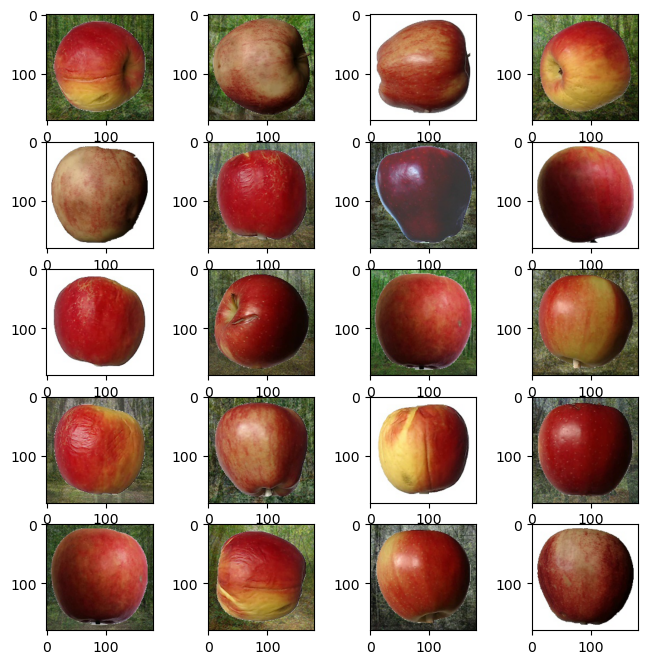

In [8]:
debug_photo( photo=img_data_train_test )    

In [9]:
## Upload train and test data of 0 class

data_location = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\3_Train_Test_Augmented_0_class"

for dir1 in os.listdir(data_location): # loop through files in each folder
              
        image_path= os.path.join(data_location, dir1) # full path to file we need to upload

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimentions
        
        image = preprocess_image(x = image, pad_value=0 )
                 
        img_data_train_test.append(image) # append each picture to single structure
        img_data_train_test_classes.append(0)     
 

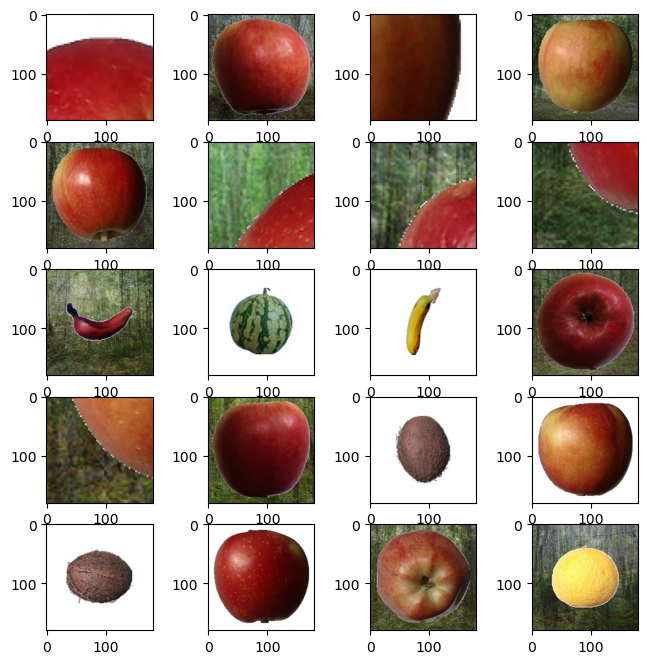

In [10]:
debug_photo( photo=img_data_train_test )    

In [11]:
### Upload last portion of 0 class non augmented photos

data_location = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\4_Train_Test_NON_Augmented_0_class"

for dir1 in os.listdir(data_location): # loop through files in each folder
              
        image_path= os.path.join(data_location, dir1) # full path to file we need to upload

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimentions
        
        image = preprocess_image(x = image, pad_value=0 )
                  
        img_data_train_test.append(image) # append each picture to single structure
        img_data_train_test_classes.append(0)     

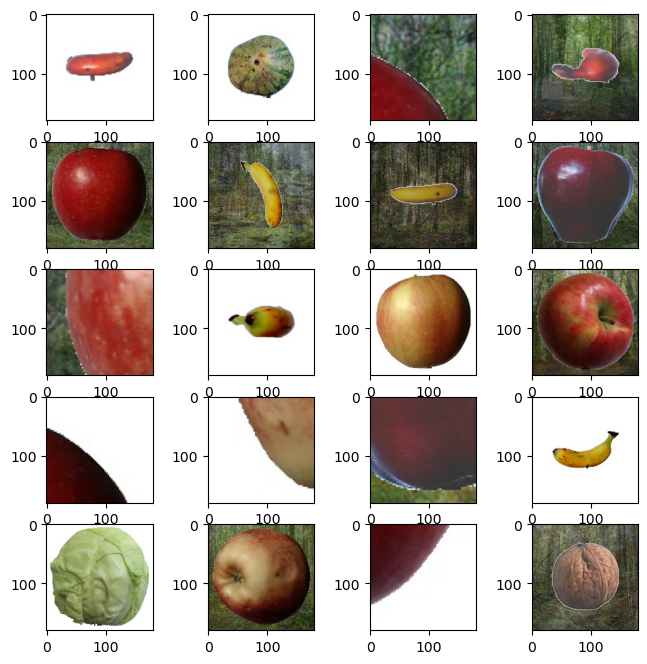

In [12]:
debug_photo( photo=img_data_train_test )    

In [13]:
# generate train and test datasets 
# sklearn and keras requre np.array class

x_train_test = np.array( img_data_train_test, dtype = "float16" )
y_train_test = np.array(img_data_train_test_classes ) # int32 by default

# https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64


In [14]:
del img_data_train_test , img_data_train_test_classes
gc.collect()

44155

In [15]:
# Normalize pixels values
    
x_train_test /= 255 

# https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a#:~:text=The%20pixel%20values%20can%20range,range%20from%200%20to%201.
# https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

In [16]:
#### how float type affects size
sys.getsizeof( x_train_test ) # for float16 , 7190625160, bytes, 7190 mega
                              # for float32 , 14381250160 ,  14381 mega, twice as much
# https://stackoverflow.com/questions/46613748/float16-vs-float32-for-convolutional-neural-networks    
# We can manipulate data type to avoid memory error

3919881760

In [17]:
[ x_train_test.shape ,y_train_test.shape ]

[(20164, 180, 180, 3), (20164,)]

In [18]:
[ x_train_test.dtype , y_train_test.dtype ]

[dtype('float16'), dtype('int32')]

In [19]:
## we want class of interest to be more than 20% to avoid class imbalance
round( sum(y_train_test) / y_train_test.shape[0] ,3 )

0.292

In [20]:
##### Split data into train and test split
# https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

# for memory error 
# https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type

# with float32 I get 
# MemoryError: Unable to allocate 10.9 GiB for an array with shape (15564, 250, 250, 3) and data type float32

# with float16 I avoid memory error with train_test_split,
# but training time is beyond reasonable timeframe

from sklearn.model_selection import train_test_split

#### train data  + remainder data ( validation and test )
x_train, x_rem, y_train, y_rem =  train_test_split( x_train_test ,  y_train_test , test_size = 0.35 , shuffle=True, stratify =  y_train_test)
  # dont confuse training and test size
    
#### remainder data split to validation and test
x_valid, x_test, y_valid, y_test = train_test_split(x_rem , y_rem , test_size=0.5,  shuffle=True, stratify =  y_rem)


In [21]:
del  x_train_test , y_train_test, x_rem, y_rem
gc.collect()

0

In [22]:
#### Back to float32, setting global policy to float16 , so far does not speed up training

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

[ x_train.dtype , x_valid.dtype , x_test.dtype ]


[dtype('float32'), dtype('float32'), dtype('float32')]

In [23]:
# debug
print(x_train.shape), print(y_train.shape) # is the largest
print(x_valid.shape), print(y_valid.shape) # valid and test are the same
print(x_test.shape), print(y_test.shape)

(13106, 180, 180, 3)
(13106,)
(3529, 180, 180, 3)
(3529,)
(3529, 180, 180, 3)
(3529,)


(None, None)

In [24]:
 # debug, check class balance

[ sum(y_train) / y_train.shape[0] , sum(y_valid) / y_valid.shape[0]   , sum(y_test) / y_test.shape[0]    ] 


[0.2916984587211964, 0.29158401813544915, 0.29186738452819494]

In [25]:
#  https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/
# Upload libraries and Choose a CNN Architecture: 

import tensorflow as tf

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPool2D

from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

from keras.losses import binary_crossentropy

from keras.optimizers import Adam

from keras.models import load_model


## methods for accuracy check

from sklearn.metrics import confusion_matrix # requires counts , integers , 1 or 0
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [26]:
#### Check policies
# https://www.tensorflow.org/api_docs/python/tf/keras/mixed_precision/global_policy
# https://keras.io/api/mixed_precision/policy/

[tf.keras.backend.floatx() , tf.keras.mixed_precision.global_policy()]

# it should help to avoid ( error message does not appear but training time is prolonged)
# "MemoryError: Unable to allocate 10.9 GiB for an array with shape (15564,250, 250, 3) and data type float32"
# 15564 is size of x_train , therefore, fit overwrites datatype to float 32

['float32', <Policy "float32">]

In [ ]:
# float16 actually leads to longer training time ,and default 
# Policy for keras is to proceed with float32

# tf.keras.mixed_precision.set_global_policy('float16')
# tf.keras.backend.set_floatx('float16') 


In [27]:
# delete model if exists
try:
    del model
except:
    print("not generated")

not generated


In [27]:

model = Sequential()

model.add( Conv2D( input_shape=(IMG_HEIGHT, IMG_WIDTH,3) , filters = 16 , kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=16 , kernel_size=(3,3) , padding="same" , activation="relu" ) )
model.add( MaxPool2D( pool_size=(2,2), strides=(2,2) ) )

model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=32, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=64, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

### current layer could be excessive , need to come up with function to instantly check the model
model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" , activation="relu" ) )
model.add( Conv2D( filters=128, kernel_size = (3,3) , padding="same" ,  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Flatten() )
model.add( Dense(units=128, activation="relu") )
model.add(Dense(units=1, activation="sigmoid")) 


In [28]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [30]:
## We can either used stored model or fit new one
## https://www.tensorflow.org/guide/mixed_precision

## having size of 150 instead of 220 increase processing for both train_test_split and fit methods

history = model.fit(
            x_train, 
            y_train,
            batch_size=32, # 
            epochs=5,
            verbose=1,
            #   validation_split=0.3
            validation_data = ( x_valid , y_valid )
)

### comments on model fit
## Input represents float16 , while we receive 
# "MemoryError: Unable to allocate 10.9 GiB for an array with shape (15564, 250, 250, 3) and data type float32"
# 15564 is size of x_train , therefore, fit overwrites datatype to float 32


Epoch 1/5
410/410 [==============================] - 316s 767ms/step - loss: 0.0519 - accuracy: 0.9820 - val_loss: 0.0124 - val_accuracy: 0.9994
Epoch 2/5
410/410 [==============================] - 298s 726ms/step - loss: 5.1178e-04 - accuracy: 0.9999 - val_loss: 1.2602e-05 - val_accuracy: 1.0000
Epoch 3/5
410/410 [==============================] - 313s 763ms/step - loss: 0.0223 - accuracy: 0.9977 - val_loss: 0.0120 - val_accuracy: 0.9972
Epoch 4/5
410/410 [==============================] - 312s 760ms/step - loss: 0.0074 - accuracy: 0.9986 - val_loss: 2.1282e-04 - val_accuracy: 1.0000
Epoch 5/5
410/410 [==============================] - 328s 799ms/step - loss: 9.5787e-06 - accuracy: 1.0000 - val_loss: 1.5029e-06 - val_accuracy: 1.0000


In [31]:
print( history.history.keys() )

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


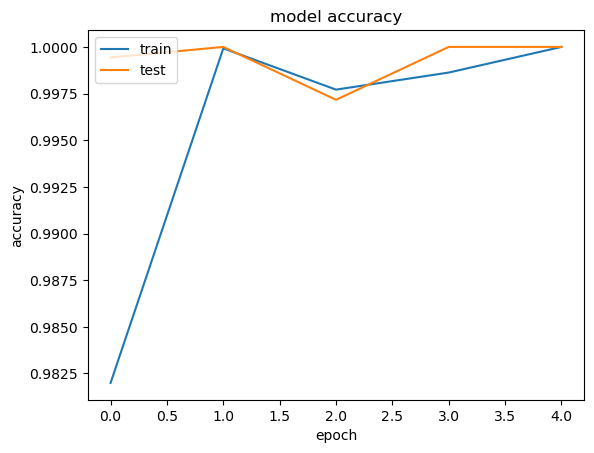

In [32]:
# summarize history for accuracy, usefull for multiple epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:

# model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v0.keras")
model = load_model(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v0.keras")
        # model below is train with max of 64 filters which detects better than complications close to Vgg16
        # 2*16 , 2*32, 2*64 , 2*128 , flat , 128
        


In [34]:
## Generate forecast with test data
out = model.predict( x_test ) 
np.unique( np.round(out,2) ) # debug , should be probabilities

# Note: increase of batch size and learning rate improved accuracy and increased recall

111/111 [==============================] - 23s 200ms/step


array([0., 1.], dtype=float32)

In [35]:
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
np.unique( np.round(out_classes,2) )

array([0, 1])

In [41]:
confusion_matrix( y_test , out_classes , labels = np.array( [1,0] )) #  np.array( [0,1] ) swithes classes, we treat 1 calss as TRUE

array([[1030,    0],
       [   0, 2499]], dtype=int64)

In [42]:
[ accuracy_score( y_test  , out_classes) , f1_score( y_test  , out_classes) ]

[1.0, 1.0]

In [43]:
[ recall_score( y_test  , out_classes) , precision_score( y_test  , out_classes) ]

[1.0, 1.0]

In [44]:
## Upload train and test data of 1-st class
# del img_data_train_test

folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_1"
os.listdir( folder_test)[1:5]

['picture_1.jpg', 'picture_10.jpg', 'picture_100.jpg', 'picture_1000.jpg']

In [45]:
## import pictures and generate labels to train model

img_data_test_array_0_class=[]

for dir1 in os.listdir(folder_test): # loop through folder in main directory
         
            image_path= os.path.join(folder_test, dir1) # full path to file we need to upload
            image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions
            
            image = preprocess_image(x = image, pad_value=0 )

            img_data_test_array_0_class.append(image) # append each picture to single structure
                

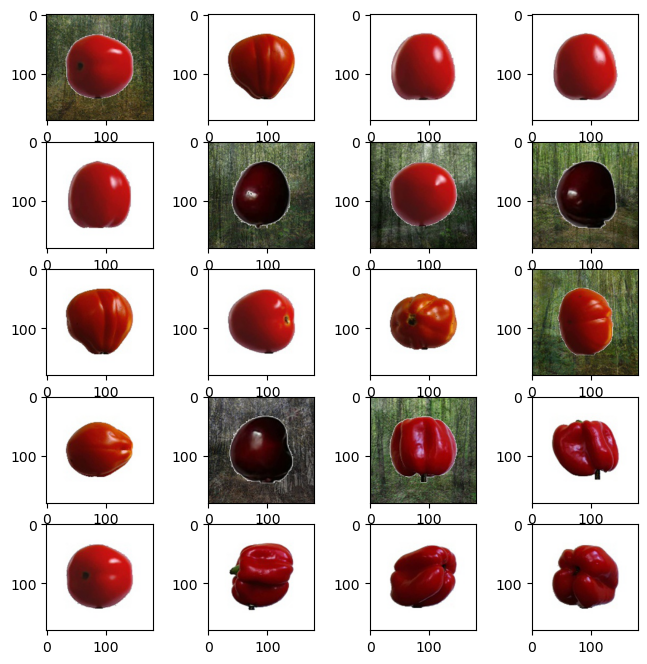

In [46]:
debug_photo( photo=img_data_test_array_0_class )          

In [47]:
x_test_buf = np.array( img_data_test_array_0_class, dtype = "float32" )
y_test_buf = np.ones(len(x_test_buf))

In [48]:
[ x_test_buf.shape , y_test_buf.shape] 

[(4750, 180, 180, 3), (4750,)]

In [49]:
## Generate forecast with test data
out = model.predict( x_test_buf ) 

149/149 [==============================] - 28s 186ms/step


In [52]:
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
np.unique(out_classes)

array([0])

In [54]:
confusion_matrix( y_test_buf , out_classes , labels = np.array( [0,1] ))# 4750 are non apples

# False Negative – The predicted value is negative, but the actual value is positive

## we claim that truth is that all pictures contain Apple, while model argues that 
## photos do not contain apple(desired outcome), therefore, in case model is able to truly differentiate
## specific to apple tone of red color, all predictions should fall into False Negative, lower left corner of confusion matrix

array([[   0,    0],
       [4750,    0]], dtype=int64)

In [55]:
### Lets explore accuracy for pictures with object having same form as apple , but different color channel

folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\1_Raw_Data_Train_Test"

img_data_array_1_class_test=[] # store pixels of target class

for dir1 in os.listdir(folder_train): # loop through folder in main directory
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ): # loop through jpg's in each folder
            
            if dir1.split("_")[1]=="y": # if folder with pictures contains "y" in name , then its 1, red apple, 0 otherwise
                                  
                image_path= os.path.join(folder_train, dir1,  dir2) # full path to file we need to upload

                image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions

              # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB

                         ## add white padding
                image = cv2.copyMakeBorder(image, 30, 30, 30, 30, 
                                           cv2.BORDER_CONSTANT, None, value=[255, 255, 255] )

                     ## resize images to a consistent input
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                                 interpolation = cv2.INTER_AREA)

                img_data_array_1_class_test.append(image) # append each picture to single structure
      

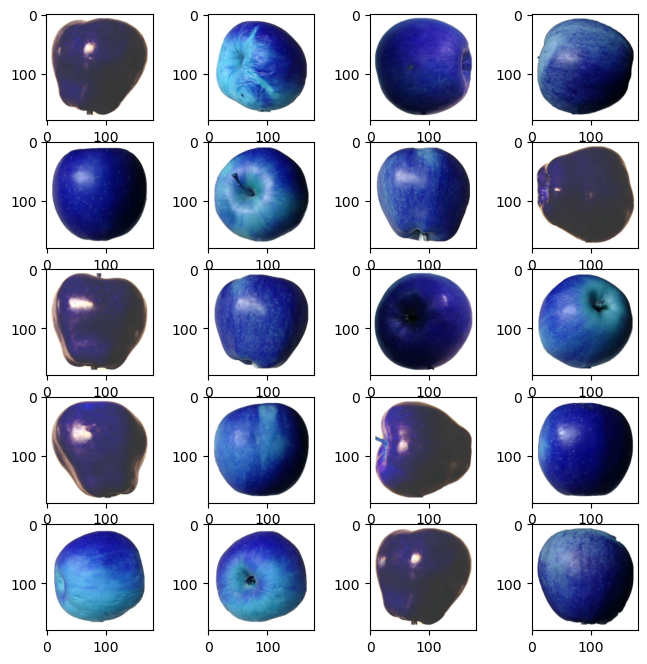

In [56]:
debug_photo( photo=img_data_array_1_class_test )     

In [57]:
image[100,100] # last value must be the largest

array([ 64, 142, 225], dtype=uint8)

In [59]:
x_test_buf = np.array( img_data_array_1_class_test, dtype = "float32" )
y_test_buf = np.ones(len(x_test_buf))

In [63]:
# we assume that all uploaded pictures are apples
[ x_test_buf.shape , y_test_buf.shape ]

[(2941, 180, 180, 3), (2941,)]

In [61]:
## Generate forecast with test data
out = model.predict( x_test_buf ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
out_classes[0:5]

92/92 [==============================] - 15s 159ms/step


array([[1],
       [1],
       [1],
       [1],
       [1]])

In [70]:
confusion_matrix( y_test_buf , out_classes,  labels = np.array( [0,1] ))  # 
# ideally, would expect all predictions in False Negatives , however,
# it might be that RGB is not signifficatly different compare to BGR channels
# for certain pictures of apples
# or color variation of 1 class photos is large enought for coefficients 
# put heavy emphasis on form rather then color

array([[   0,    0],
       [ 982, 1959]], dtype=int64)

In [71]:
folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\5_Test_FN_0_class\Augmented_2"
os.listdir( folder_test)[1:5]

['picture_dif_form1.jpg',
 'picture_dif_form10.jpg',
 'picture_dif_form100.jpg',
 'picture_dif_form1000.jpg']

In [72]:
img_data_test_array_1_class_alt_form=[]

for dir1 in os.listdir(folder_test): # loop through folder in main directory
         
            image_path= os.path.join(folder_test, dir1) # full path to file we need to upload
            image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture, colored , 3 dimensions
            
            image = preprocess_image(x = image, pad_value=0 )

            img_data_test_array_1_class_alt_form.append(image) # append each picture to single structure
                

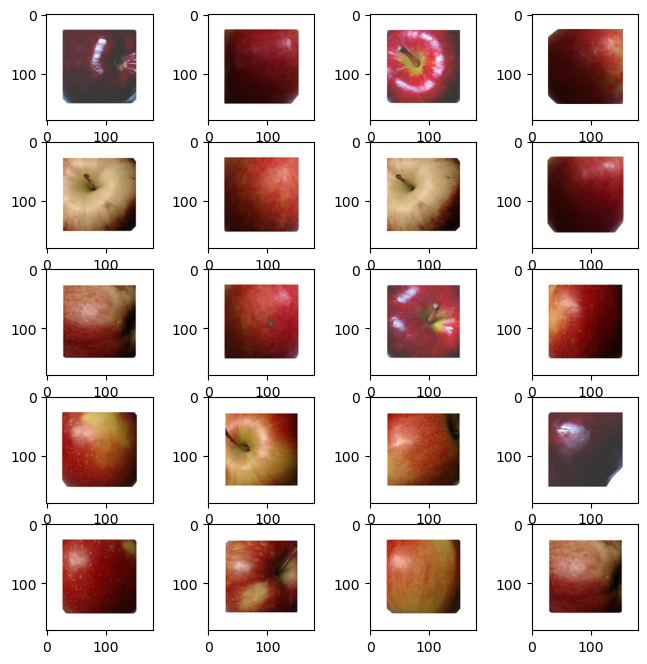

In [73]:
debug_photo( photo=img_data_test_array_1_class_alt_form )    

In [74]:
x_test_buf = np.array( img_data_test_array_1_class_alt_form, dtype = "float32" )
y_test_buf = np.ones(len(x_test_buf))

In [75]:
out = model.predict( x_test_buf ) 
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
out_classes[0:5]

92/92 [==============================] - 13s 139ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]])

In [76]:
confusion_matrix( y_test_buf , out_classes)      
# We can assume that form of apple represents more important feature
# compare to color channels

array([[   0,    0],
       [2941,    0]], dtype=int64)

In [85]:
############## Train Vgg16 model

model=Sequential()

model.add(Conv2D(input_shape=(IMG_WIDTH,IMG_HEIGHT,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 
##units are 1 because we are using binary activation

In [86]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 conv2d_48 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 conv2d_50 (Conv2D)          (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 45, 45, 128)      0         
 g2D)                                                 

In [88]:
history = model.fit(
            x_train, 
            y_train,
            batch_size=32, # 
            epochs=5,
            verbose=1,
            #   validation_split=0.3
            validation_data = ( x_valid , y_valid )
)

Epoch 1/5
410/410 [==============================] - 5353s 13s/step - loss: 0.6822 - accuracy: 0.7082 - val_loss: 0.6037 - val_accuracy: 0.7084
Epoch 2/5
410/410 [==============================] - 5310s 13s/step - loss: 0.6045 - accuracy: 0.7083 - val_loss: 0.6063 - val_accuracy: 0.7084
Epoch 3/5
410/410 [==============================] - 5300s 13s/step - loss: 0.6044 - accuracy: 0.7083 - val_loss: 0.6045 - val_accuracy: 0.7084
Epoch 4/5
410/410 [==============================] - 5336s 13s/step - loss: 0.6045 - accuracy: 0.7083 - val_loss: 0.6036 - val_accuracy: 0.7084
Epoch 5/5
410/410 [==============================] - 5308s 13s/step - loss: 0.6042 - accuracy: 0.7083 - val_loss: 0.6038 - val_accuracy: 0.7084


In [89]:
model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_vgg16.keras")

In [90]:
## Generate forecast with test data
out = model.predict( x_test ) 

111/111 [==============================] - 302s 3s/step


In [91]:
out_classes = ( out >= 0.7 ) + 0 # to whole numbers 
out_classes[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [92]:
confusion_matrix( y_test , out_classes)

array([[2499,    0],
       [1030,    0]], dtype=int64)

In [93]:
[ accuracy_score( y_test  , out_classes) , f1_score( y_test  , out_classes) ]

[0.7081326154718051, 0.0]

In [95]:
[ recall_score( y_test  , out_classes) , precision_score( y_test  , out_classes) ]

D:\Anaconda\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.0, 0.0]